In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud


In [4]:
data=pd.read_excel('/content/netflix.xlsx')

In [5]:
data.head()

,title,rating,ratingLevel,ratingDescription,release year,user rating score,user rating size
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",80,2004,82.0,80
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",100,2006,NaN,82
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,98.0,80
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2008,98.0,80
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,70,2014,94.0,80


In [6]:
#Calculating misinng values
data.isnull().sum()

title                  0
rating                 0
ratingLevel           59
ratingDescription      0
release year           0
user rating score    395
user rating size       0
dtype: int64

In [7]:
data.value_counts('rating')

rating
TV-14       234
PG          170
TV-MA       148
G           138
TV-Y         68
TV-PG        59
TV-G         52
TV-Y7-FV     44
TV-Y7        38
R            19
PG-13        15
NR           14
UR            1
dtype: int64

In [8]:
data['rating']=data['rating'].replace(['NR'],'NaN')

In [9]:
data.value_counts('rating')

rating
TV-14       234
PG          170
TV-MA       148
G           138
TV-Y         68
TV-PG        59
TV-G         52
TV-Y7-FV     44
TV-Y7        38
R            19
PG-13        15
NaN          14
UR            1
dtype: int64

In [10]:
data['rating']=data['rating'].replace(['NaN'],'TV-14')

In [ ]:
data.isnull().sum()

title                  0
rating                 0
ratingLevel           59
ratingDescription      0
release year           0
user rating score    395
user rating size       0
dtype: int64

In [11]:
data['ratingLevel'].value_counts()

Parents strongly cautioned. May be unsuitable for children ages 14 and under.    224
General Audiences. Suitable for all ages.                                        134
Suitable for all ages.                                                           120
For mature audiences.  May not be suitable for children 17 and under.            110
Parental guidance suggested. May not be suitable for all children.                54
                                                                                ... 
dialogue, language, sexual situations and violence                                 1
action and some rude humor                                                         1
action and violence throughout, and mild language                                  1
some scary action, rude humor and language                                         1
some rude humor and sports action                                                  1
Name: ratingLevel, Length: 99, dtype: int64

In [12]:
data['ratingLevel'].fillna('Parents strongly cautioned. May be unsuitable for children ages 14 and under.',inplace=True)

In [13]:
data.isnull().sum()

title                  0
rating                 0
ratingLevel            0
ratingDescription      0
release year           0
user rating score    395
user rating size       0
dtype: int64

In [14]:
data['user rating score'].mean()

84.09421487603306

In [15]:
data['user rating score'].mode()

0    98.0
dtype: float64

In [16]:
data['user rating score'].fillna('84.0',inplace=True)

In [17]:
data['user rating size'].value_counts()

80    605
82    388
81      7
Name: user rating size, dtype: int64

In [18]:
data.head()

,title,rating,ratingLevel,ratingDescription,release year,user rating score,user rating size
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",80,2004,82.0,80
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",100,2006,84.0,82
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,98.0,80
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2008,98.0,80
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,70,2014,94.0,80


In [ ]:
# With this filling all the empty rows has been completed

In [19]:
data.shape

(1000, 7)

In [20]:
data.size

7000

In [21]:
data.dtypes

title                object
rating               object
ratingLevel          object
ratingDescription     int64
release year          int64
user rating score    object
user rating size      int64
dtype: object

In [22]:
data = data.astype({'user rating score':'float'})

In [23]:
data.dtypes

title                 object
rating                object
ratingLevel           object
ratingDescription      int64
release year           int64
user rating score    float64
user rating size       int64
dtype: object

In [24]:
data.describe()

,ratingDescription,release year,user rating score,user rating size
count,1000.00000,1000.000000,1000.00000,1000.000000
mean,67.36600,2010.335000,84.05700,80.783000
std,30.78561,8.877927,9.59864,0.973066
min,10.00000,1940.000000,55.00000,80.000000
25%,35.00000,2007.000000,83.00000,80.000000
50%,60.00000,2015.000000,84.00000,80.000000
75%,90.00000,2016.000000,91.00000,82.000000
max,124.00000,2017.000000,99.00000,82.000000


In [25]:
data.corr()

,ratingDescription,release year,user rating score,user rating size
ratingDescription,1.000000,0.408020,0.225044,-0.226207
release year,0.408020,1.000000,0.221716,-0.003280
user rating score,0.225044,0.221716,1.000000,-0.004783
user rating size,-0.226207,-0.003280,-0.004783,1.000000


In [26]:
data['title'].unique()

array(['White Chicks', 'Lucky Number Slevin', "Grey's Anatomy",
       'Prison Break', 'How I Met Your Mother', 'Supernatural',
       'Breaking Bad', 'The Vampire Diaries', 'The Walking Dead',
       'Pretty Little Liars', 'Once Upon a Time', 'Sherlock',
       'Death Note', 'Naruto', 'The Hunter', 'Lottie Dottie Chicken',
       'Arrow', 'Black Mirror', 'The Originals', 'The 100',
       'Masha and the Bear', 'Ã“ Pai, Ã“ - Look at This',
       'Nymphomaniac: Volume 1', 'Hunter X Hunter (2011)',
       "Marvel's Luke Cage", "Marvel's Iron Fist", 'Narcos', 'The Flash',
       'The Seven Deadly Sins', 'Scream', 'The Do-Over',
       'OperaÃ§Ãµes Especiais', 0.03, 'Trollhunters', 'Fearless',
       'Hyena Road', 'Santa Clarita Diet', 'Sex, Love and Therapy',
       'White Girl', 'Girlboss', 'City of God: 10 Years Later',
       '13 Reasons Why', 'Sand Castle',
       'Salvador Martinha - Tip of the Tongue', 'Sandy Wexler',
       'O Amor no DivÃ£', 'Stronger Than the World', 'Back and F

In [27]:
data['user rating score'].value_counts()

84.0    408
98.0     46
97.0     36
95.0     33
91.0     33
94.0     32
96.0     31
92.0     28
81.0     27
93.0     24
80.0     21
83.0     18
74.0     16
61.0     15
88.0     15
86.0     14
90.0     13
68.0     12
79.0     12
82.0     12
57.0     12
89.0     12
70.0     11
77.0     10
67.0     10
85.0     10
64.0     10
62.0      9
99.0      8
72.0      8
71.0      7
73.0      7
58.0      6
56.0      6
69.0      5
66.0      5
65.0      5
63.0      4
78.0      4
55.0      2
75.0      2
59.0      1
Name: user rating score, dtype: int64

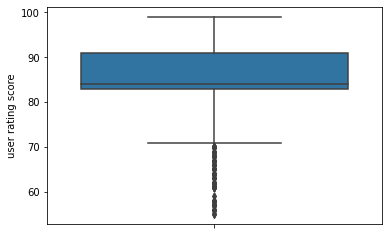

In [28]:
sns.boxplot(y=data['user rating score'])

In [29]:
data=data.loc[data["user rating score"]>60.0]
data

,title,rating,ratingLevel,ratingDescription,release year,user rating score,user rating size
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",80,2004,82.0,80
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",100,2006,84.0,82
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,98.0,80
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2008,98.0,80
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,70,2014,94.0,80
...,...,...,...,...,...,...,...
995,The BFG,PG,"for action/peril, some scary moments and brief...",60,2016,97.0,80
996,The Secret Life of Pets,PG,for action and some rude humor,60,2016,84.0,81
997,Precious Puppies,TV-G,Suitable for all ages.,35,2003,84.0,82
998,Beary Tales,TV-G,Suitable for all ages.,35,2013,84.0,82


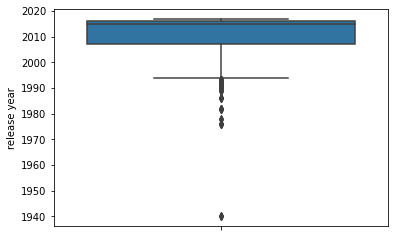

In [30]:
sns.boxplot(y=data['release year'])

In [31]:
data=data.loc[data['release year']>1995]
data

,title,rating,ratingLevel,ratingDescription,release year,user rating score,user rating size
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",80,2004,82.0,80
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",100,2006,84.0,82
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,98.0,80
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2008,98.0,80
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,70,2014,94.0,80
...,...,...,...,...,...,...,...
995,The BFG,PG,"for action/peril, some scary moments and brief...",60,2016,97.0,80
996,The Secret Life of Pets,PG,for action and some rude humor,60,2016,84.0,81
997,Precious Puppies,TV-G,Suitable for all ages.,35,2003,84.0,82
998,Beary Tales,TV-G,Suitable for all ages.,35,2013,84.0,82


In [32]:
pd.crosstab(index=data['ratingLevel'],columns=data['rating'])

rating,G,PG,PG-13,R,TV-14,TV-G,TV-MA,TV-PG,TV-Y,TV-Y7,TV-Y7-FV,UR
ratingLevel,,,,,,,,,,,,
For mature audiences. May not be suitable for children 17 and under.,0,0,0,0,0,0,107,0,0,0,0,0
"For some rude and suggestive material, and for language.",0,0,2,0,0,0,0,0,0,0,0,0
General Audiences. Suitable for all ages.,90,0,0,0,0,0,0,0,0,0,0,0
Parental guidance suggested. May not be suitable for all children.,0,0,0,0,0,0,0,52,0,0,0,0
Parental guidance suggested. May not be suitable for children.,0,10,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
"thematic elements, brief violence and innuendo",0,0,1,0,0,0,0,0,0,0,0,0
"thematic elements, scary images, action and peril",0,2,0,0,0,0,0,0,0,0,0,0
"thematic elements, scary images, some language and suggestive humor",0,4,0,0,0,0,0,0,0,0,0,0


In [33]:
# removing all r rated titles
data=data.loc[data['rating']!='R']
data

,title,rating,ratingLevel,ratingDescription,release year,user rating score,user rating size
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",80,2004,82.0,80
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,98.0,80
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2008,98.0,80
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,70,2014,94.0,80
5,Supernatural,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,95.0,80
...,...,...,...,...,...,...,...
995,The BFG,PG,"for action/peril, some scary moments and brief...",60,2016,97.0,80
996,The Secret Life of Pets,PG,for action and some rude humor,60,2016,84.0,81
997,Precious Puppies,TV-G,Suitable for all ages.,35,2003,84.0,82
998,Beary Tales,TV-G,Suitable for all ages.,35,2013,84.0,82


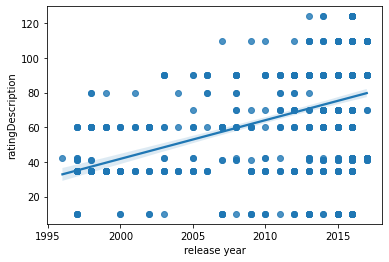

In [34]:
sns.regplot(x='release year',y='ratingDescription',data=data)

(array([ 14., 244.,  57., 144.,  67.,   0.,  43.,   1., 146.,  50.,  94.,
         33.]),
 array([ 0.        ,  0.83333333,  1.66666667,  2.5       ,  3.33333333,
         4.16666667,  5.        ,  5.83333333,  6.66666667,  7.5       ,
         8.33333333,  9.16666667, 10.        ]),
 <a list of 12 Patch objects>)

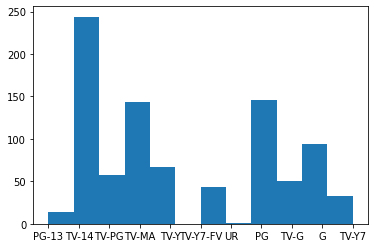

In [35]:
# Visualizing
plt.hist(x=data['rating'],bins=12)

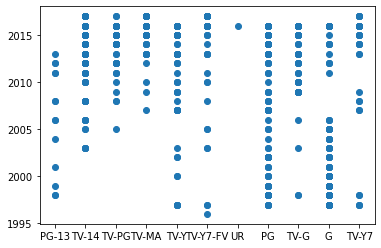

In [36]:
plt.scatter(x=data['rating'],y=data['release year'])

In [44]:
data.head()

,title,rating,ratingLevel,ratingDescription,release year,user rating score,user rating size
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",80,2004,82.0,80
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,98.0,80
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2008,98.0,80
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,70,2014,94.0,80
5,Supernatural,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,95.0,80


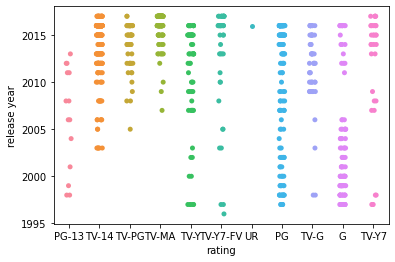

In [49]:
sns.stripplot(x=data['rating'],y=data['release year'])

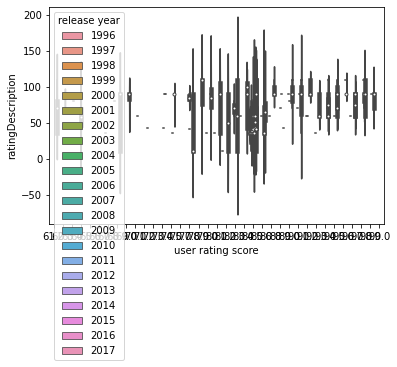

In [51]:
sns.violinplot(x=data['user rating score'],y=data['ratingDescription'],hue=data['release year'])

In [53]:
sns.lmplot(x=data['user rating score'],y=data['ratingDescription'],hue=data['release year'],data=data)

KeyError: ignored

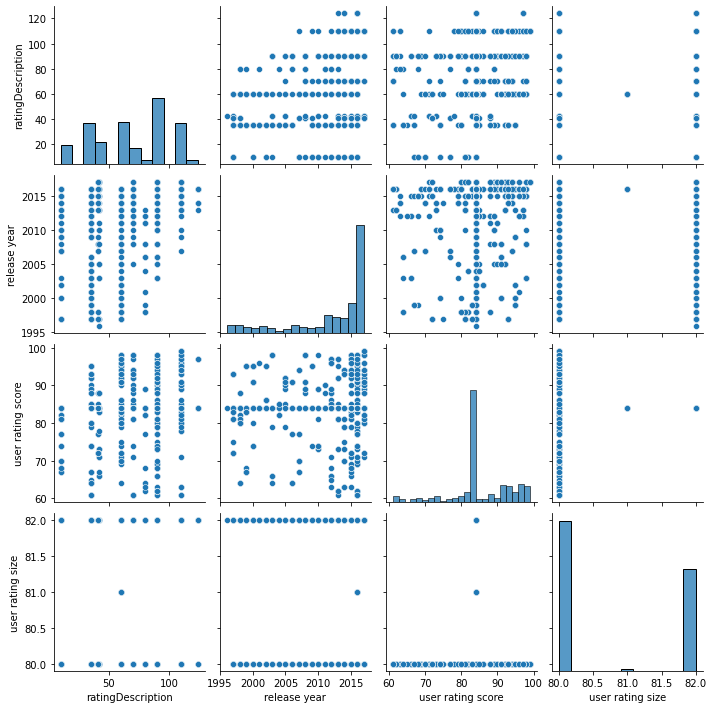

In [54]:
sns.pairplot(data)

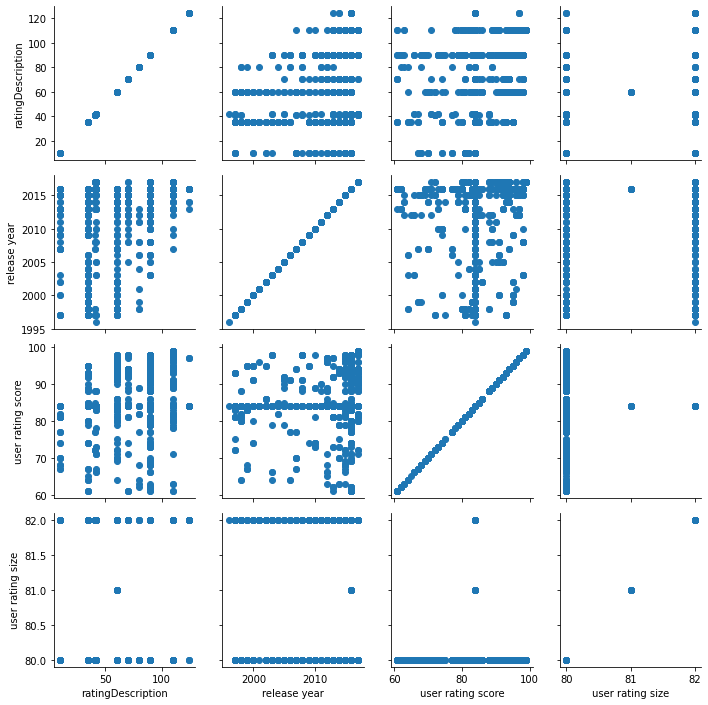

In [55]:
h = sns.PairGrid(data)
h=h.map(plt.scatter)

In [37]:
word_cloud_title=WordCloud(width=2500,height=1000,background_color='cyan',min_font_size=2 ,
                        min_word_length=2).generate(str(data['title']))

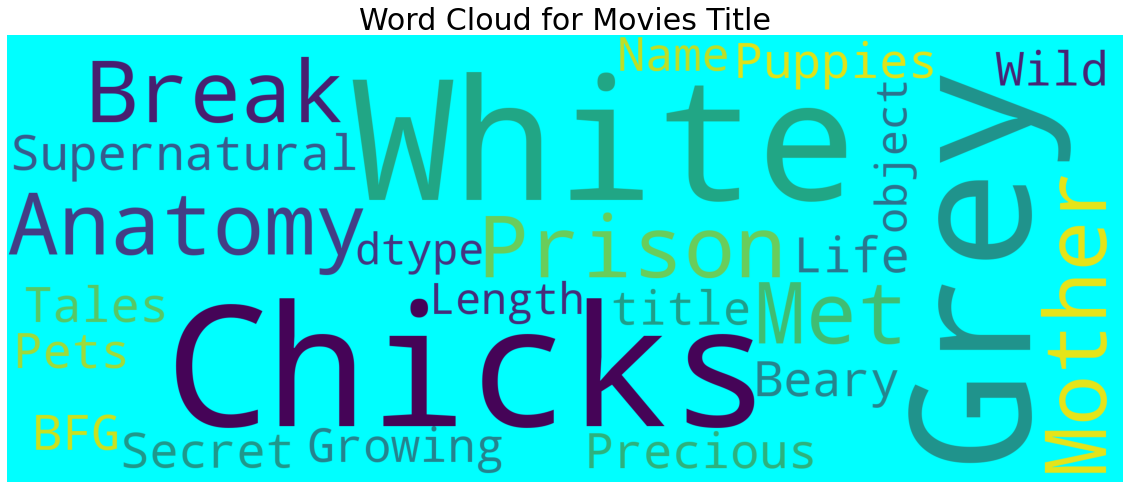

In [ ]:
plt.figure(figsize=(20,10))
plt.axis('off')
plt.title('Word Cloud for Movies Title',fontsize=30)
plt.imshow(word_cloud_title);

In [ ]:
data1=data.loc[data['title']=='Grey Anatomy']
data1

,title,rating,ratingLevel,ratingDescription,release year,user rating score,user rating size
